# Riss 인기 학술자료 텍스트 마이닝

## 1. 사용할 패키지 설치

https://www.oracle.com/java/technologies/downloads/#jdk19-mac   
Java JDK 다운로드.   
konlpy를 사용하기 위해 필요.

에러 발생시 (M1)  
https://www.azul.com  
https://velog.io/@wijoonwu/맥북Mac-OS-M1-JDK-설치하기

In [2]:
!pip3 install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 38.8 MB/s eta 0:00:00a 0:00:01
  Using cached trio_websocket-0.10.2-py3-none-any.whl (17 kB)
  Using cached trio-0.22.0-py3-none-any.whl (384 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.0/157.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.2/123.2 kB 17.0 MB/s eta 0:00:00
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached exceptiongroup-1.1.1-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 7.4 MB/s eta 0:00:00
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)

[notice] A new release of pip is available: 

In [3]:
!pip3 install jpype1

  Using cached JPype1-1.4.1-cp310-cp310-macosx_10_9_universal2.whl (590 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [6]:
!pip3 install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
  Using cached lxml-4.9.2.tar.gz (3.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lxml: filename=lxml-4.9.2-cp310-cp310-macosx_10_9_universal2.whl size=3150017 sha256=ca71e7e035e5670509e32591306aa562707746c35563c48f657b7cdae7fa94ad
  Stored in directory: /Users/uuu9/Library/Caches/pip/wheels/5a/51/0e/95b4a6ddee4a616530c36aeb03dafb5e04183756d9973a7d5d
Successfully built lxml


## 2. 사용할 패키지 호출

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By

## 3. 프로그래밍

In [7]:
# webdriver 실행 후 riss 이동
browser = webdriver.Chrome()
browser.get("http://www.riss.kr/PopularList.do") 

In [8]:
# 현제 제공되고 있는 인기 학술자료 목록이 사용된 기간을 저장한다.
span1 = browser.find_element(By.CLASS_NAME, 'periodSpan1').text
span2 = browser.find_element(By.CLASS_NAME, 'periodSpan2').text
data_date = (span1 + "~" +span2)
data_date

'2023.4.30~2023.5.27'

In [9]:
# 페이지의 자료 확장
browser.find_element(By.ID, 'nextList').click()

In [10]:
thesis_data = browser.find_elements(By.TAG_NAME, 'tr')

csv = open(f"csv/{data_date}.csv", "a")
csv.write("논문 제목, 링크\n")
csv.close()

for thesis_data_sort in thesis_data:
    thesis_titles = thesis_data_sort.find_elements(By.CLASS_NAME, 'title')
    
    for thesis_title_data in thesis_titles:
        title = thesis_title_data.text
        link = thesis_title_data.get_attribute("href")
        
        csv = open(f"csv/{data_date}.csv", "a")
        csv.write(f"{title}, {link}\n")
        csv.close()
        
        file = open(f"txt/{data_date}.txt", "a")
        file.write(f"{title}\n")
        file.close()

In [11]:
# 저장한 텍스트 파일 읽어오기
file_data = open(f"txt/{data_date}.txt", encoding= "UTF-8").read()
file_data

'미래 사회에서 메타버스 교육의 방향\n사형제도는 폐지되어야 하는가?\n촉법소년 상한(형사미성년자) 연령 하향에 대한 비판적 고찰\n스트레스 수준이 대학생들의 학업 성취도에 미치는 영향\n챗GPT 충격파… 성큼 다가온 인공지능\n챗GPT에 빼앗긴 밥그릇\n노키즈존 확산, 어떻게 볼 것인가?\n대리모 산업의 윤리적 문제와 해결방안\n국내외 가짜뉴스(Fake News)에 대한 뉴스 공정성 연구논의 탐색\n[토론문 1] 저출산·고령화와 인구정책\nMZ 세대의 개인주의 문화, 어떻게 볼 것인가?\n촉법소년 상한연령 하향 인식에의 영향요인 - 소년사법 실무전문가들을 중심으로 -\n구글 시대 저무나? 인공지능 ‘챗GPT’ 돌풍\n헤어질 결심\n고교학점제의 쟁점과 과제 분석\n영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능과 하이퍼 인공지능을 중심으로\n사상체질과 MBTI성격유형검사를 통한 대학생 건강염려증의 상관관계연구\n인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교\n최저임금제도 개선방안에 관한 연구\n챗봇 기반 인공지능 교육 프로그램 개발과 적용\n다이어트, 당신은 건강합니까?\n나이팅게일과 업적\n한국 인공지능 교육의 방향\n고교학점제 도입 추진 정책에 대한 비판적 검토\n행동주의 상담과 인본주의 상담의 특성 비교\n간호관리자의 변혁적 리더십과 서번트 리더십이 신규간호사의 조직사회화에 미치는 영향: 집단효능감의 매개 효과\nMZ세대의 MBTI에 따른 여가활동 선택과 여가태도\n미혼 성인남녀의 저출산 정책 인식에 관한 연구\n음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성\n일본의 후쿠시마 오염수 해양 방출 계획 저지를 위한 한국의 대응 전략: 방사성물질로부터 영해 수호를 위한 정책적 제언\n미국의 청소년 마약류 사용 대응 정책 고찰을 통한 국내 정책의 시사점\n펜타닐에 대한 중독경험자와 전문가의 인식 차이\n[CLICK] 음식점,카페 "노키즈존" 확산\n우리 사회의 능력주의는 제대로 작동하고 있는가?\n인공지능 리터러시

In [12]:
# 불필요한 문자 제거
# '[^가-힣]' : 한글이 아닌 모든 문자
import re
file_data = re.sub('[^가-힣]', ' ', file_data)
file_data

'미래 사회에서 메타버스 교육의 방향 사형제도는 폐지되어야 하는가  촉법소년 상한 형사미성년자  연령 하향에 대한 비판적 고찰 스트레스 수준이 대학생들의 학업 성취도에 미치는 영향 챗    충격파  성큼 다가온 인공지능 챗   에 빼앗긴 밥그릇 노키즈존 확산  어떻게 볼 것인가  대리모 산업의 윤리적 문제와 해결방안 국내외 가짜뉴스           에 대한 뉴스 공정성 연구논의 탐색  토론문    저출산 고령화와 인구정책    세대의 개인주의 문화  어떻게 볼 것인가  촉법소년 상한연령 하향 인식에의 영향요인   소년사법 실무전문가들을 중심으로   구글 시대 저무나  인공지능  챗     돌풍 헤어질 결심 고교학점제의 쟁점과 과제 분석 영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구   신체가 있는 인공지능과 하이퍼 인공지능을 중심으로 사상체질과     성격유형검사를 통한 대학생 건강염려증의 상관관계연구 인지발달에 대한 삐아제 이론과 비고츠키 이론의 비교 최저임금제도 개선방안에 관한 연구 챗봇 기반 인공지능 교육 프로그램 개발과 적용 다이어트  당신은 건강합니까  나이팅게일과 업적 한국 인공지능 교육의 방향 고교학점제 도입 추진 정책에 대한 비판적 검토 행동주의 상담과 인본주의 상담의 특성 비교 간호관리자의 변혁적 리더십과 서번트 리더십이 신규간호사의 조직사회화에 미치는 영향  집단효능감의 매개 효과   세대의     에 따른 여가활동 선택과 여가태도 미혼 성인남녀의 저출산 정책 인식에 관한 연구 음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성 일본의 후쿠시마 오염수 해양 방출 계획 저지를 위한 한국의 대응 전략  방사성물질로부터 영해 수호를 위한 정책적 제언 미국의 청소년 마약류 사용 대응 정책 고찰을 통한 국내 정책의 시사점 펜타닐에 대한 중독경험자와 전문가의 인식 차이         음식점 카페  노키즈존  확산 우리 사회의 능력주의는 제대로 작동하고 있는가  인공지능 리터러시 기반의 설명가능한 인공지능 교육 프로그램의 효과 예비 초등 

#### m1 맥에서 jvm을 제대로 찾지 못하는 이슈가 있었음.
#### 맨 위의 링크를 통해 설치하고 경로를 직접 설정
#### https://github.com/konlpy/konlpy/issues/353 해당 페이지 참조

In [13]:
# 명사 추출
import konlpy
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/bin/java'


hannanum = konlpy.tag.Hannanum(jvmpath=JVM_PATH)
nouns_data = hannanum.nouns(file_data)
print(nouns_data)


['미래', '사회', '메타버스', '교육', '방향', '사형제도', '폐', '촉법소년', '형사미성년자', '연령', '하향', '비판적', '고찰', '스트레스', '수준', '대학생들', '학업', '성취도', '영향', '챗', '충격파', '인공지능', '챗', '밥그릇', '노키즈존', '확산', '것', '대리모', '산업', '윤리적', '문제', '해결방안', '국내외', '가짜뉴스', '뉴스', '공정성', '연구논', '탐색', '토론문', '저출산', '고령화', '인구정책', '세대', '개인주의', '문화', '것', '촉법소년', '상한연령', '하향', '식', '영향요', '소년사법', '실무전문가들', '중심', '구글', '시대', '인공지능', '챗', '돌풍', '결심', '고교학점제', '쟁점', '과제', '분석', '영화', '속', '인공지능', '인간화', '인간지배', '현상', '연구', '신체', '인공지능', '하이퍼', '인공지능', '중심', '사상체질', '성격유형검사', '대학생', '건강염려증', '상관관계연구', '인지발달', '삐아제', '이론', '비고츠키', '이론', '비교', '최저임금제', '개선방안', '연구', '챗봇', '기반', '인공지능', '교육', '프로그램', '개발', '적용', '다이어트', '당신', '건강', '나이팅게일', '업적', '한국', '인공지능', '교육', '방향', '고교학점제', '도입', '추진', '정책', '비판적', '검토', '행동주의', '상담', '인본주의', '상담', '특성', '비교', '간호관리자', '변혁적', '리더십', '서번트', '리더십', '신규간호사', '조직사회화', '영향', '집단효능감', '매개', '효과', '세대', '여가활동', '선택', '여가태도', '미혼', '성인남녀', '저출산', '정책', '식', '연구', '음악치료', '소개', '음악', '매개체', '특별', '우수성', '일본'

In [17]:
import pandas as pd
df_word = pd.DataFrame({'word' : nouns_data})
df_word

,word
0,미래
1,사회
2,메타버스
3,교육
4,방향
...,...
530,영향
531,연구
532,사형제도
533,교회사적


In [18]:
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,미래,2
1,사회,2
2,메타버스,4
3,교육,2
4,방향,2
...,...,...
530,영향,2
531,연구,2
532,사형제도,4
533,교회사적,4


In [19]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
        .sort_values('n', ascending=False)
df_word

,word,n
241,인공지능,23
204,연구,17
33,교육,8
274,정책,6
24,고찰,5
...,...,...
142,산업,1
140,사회복지공동모금회,1
137,사용실태,1
135,사상체질,1


In [20]:
# 단어 빈도 막대 그래프
top20 = df_word.head(20)

In [21]:
!pip3 install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 14.7 MB/s eta 0:00:0000:0100:01
  Using cached contourpy-1.0.7-cp310-cp310-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.5 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.9 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


<Axes: xlabel='n', ylabel='word'>

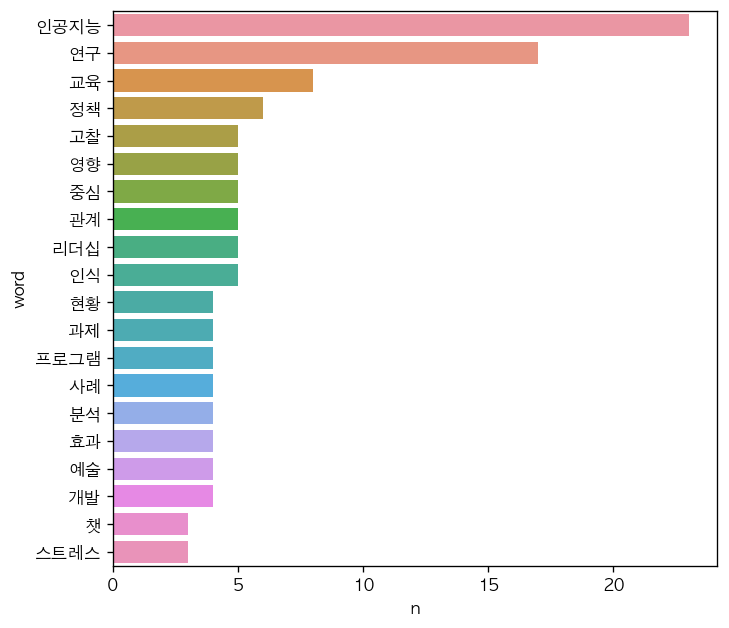

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트의 경우 
# https://github.com/GUuu9/Nas_Docker_jupyter_Ko_fonts
# 해당 페이지을 참고하여 폰트 설정

plt.rcParams.update({'font.family' : 'AppleGothic',
                    'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

bar_data = sns.barplot(data = top20, y = 'word', x= 'n')
plt.savefig(f'barplot/{data_date}.png', dpi=300)
bar_data

In [32]:
# 워드 클라우드 생성
!pip3 install wordcloud

In [33]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'인공지능': 23,
 '연구': 17,
 '교육': 8,
 '정책': 6,
 '고찰': 5,
 '영향': 5,
 '중심': 5,
 '관계': 5,
 '리더십': 5,
 '인식': 5,
 '현황': 4,
 '과제': 4,
 '프로그램': 4,
 '사례': 4,
 '분석': 4,
 '효과': 4,
 '예술': 4,
 '개발': 4,
 '챗': 3,
 '스트레스': 3,
 '방안': 3,
 '저출산': 3,
 '방향': 3,
 '이론': 3,
 '건강': 3,
 '심리적': 3,
 '시대': 3,
 '세대': 3,
 '상담': 3,
 '창의성': 2,
 '노키즈존': 2,
 '나이팅게일': 2,
 '의': 2,
 '차': 2,
 '성공': 2,
 '대학생': 2,
 '사회': 2,
 '미래': 2,
 '또래': 2,
 '사회적': 2,
 '대응': 2,
 '쟁점': 2,
 '수': 2,
 '창작': 2,
 '다이어트': 2,
 '초등학생': 2,
 '마약': 2,
 '촉법소년': 2,
 '식': 2,
 '시사점': 2,
 '행동': 2,
 '비교': 2,
 '활용': 2,
 '비판': 2,
 '개선방안': 2,
 '확산': 2,
 '비판적': 2,
 '변화': 2,
 '것': 2,
 '경험': 2,
 '고교학점제': 2,
 '기술': 2,
 '적용': 2,
 '법': 2,
 '임파워먼트': 2,
 '윤리적': 2,
 '해결방안': 2,
 '교양교육': 2,
 '윤리': 2,
 '기반': 2,
 '사형제도': 2,
 '사용': 2,
 '하향': 2,
 '국내외': 2,
 '음식점': 2,
 '저감': 1,
 '자기결정권': 1,
 '전문가': 1,
 '자동': 1,
 '작품': 1,
 '전망': 1,
 '장기이식': 1,
 '자동창작시대': 1,
 '자아존중감': 1,
 '자연': 1,
 '전략': 1,
 '저항성': 1,
 '작동': 1,
 '가능성': 1,
 '일제': 1,
 '음펨바': 1,
 '음악': 1,
 '을': 1,
 '윤리의식': 1,
 '유전자편

In [41]:
from wordcloud import WordCloud
we = WordCloud(random_state = 1234,
              font_path = 'AppleGothic',
              width = 400,
              height = 400,
              background_color = 'white')

ImportError: cannot import name 'WordCloud' from 'wordcloud' (unknown location)

In [35]:
img_wordcloud = we.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
img_wordcloud = plt.imshow(img_wordcloud)
plt.savefig(f'wordcloud/{data_date}.png', dpi=300)
img_wordcloud

NameError: name 'we' is not defined

➜Riss_Popular_thesis_wordCloud git:(main) ✗ git init  
Reinitialized existing Git repository in /Users/uuu9/GIT/Riss_Popular_thesis_wordCloud/.git/  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git add .  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git commit -m "init commit"  
[main d8ae137] init commit  
 6 files changed, 537 insertions(+), 334 deletions(-)  
 create mode 100644 barplot/2023.3.5~2023.4.1.png  
 create mode 100644 csv/2023.3.5~2023.4.1.csv  
 create mode 100644 txt/2023.3.5~2023.4.1.txt  
 create mode 100644 wordcloud/2023.3.5~2023.4.1.png  
➜  Riss_Popular_thesis_wordCloud git:(main) git branch -M main  

➜  Riss_Popular_thesis_wordCloud git:(main) git push origin main  
Enumerating objects: 19, done.  
Counting objects: 100% (19/19), done.  
Delta compression using up to 10 threads  
Compressing objects: 100% (12/12), done.  
Writing objects: 100% (12/12), 900.67 KiB | 19.58 MiB/s, done.  
Total 12 (delta 6), reused 0 (delta 0), pack-reused 0  
remote: Resolving deltas: 100% (6/6), completed with 5 local objects.  
To https://github.com/GUuu9/Riss_Popular_thesis_wordCloud.git  
   5137005..d8ae137  main -> main  

에러 발생시
git push -f origin 명령으로 강제 업로드